# Auxílio na tomada de decisão no processo de escolha de frutas e vegetais
### by Lucas de Jesus

Neste notebook será treinado um modelo de **3 saídas**, indicando a qualidade do alimento:
<ul>
    <li>0 = Good</li>
    <li>1 = Bad</li>
    <li>2 = Mixed</li>(trata-se de imagens que contenham frutas boas e ruins ao mesmo tempo)</li>
</ul>

Importação das bibliotecas necessárias

In [ ]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

## Tratamento/organização da estrutura dos dados

Aqui é feita a leitura do arquivo csv criado no primeiro notebook. Note que um total de 19526 imagens foram processadas, tendo cada uma gerado um conjunto de dados composto de 2048 números. Além disso, o arquivo csv carrega a localização do arquivo de cada imagem e a da fruta estabelecida pelo dataset.

OBS: o arquivo .csv também está disponível em : https://drive.google.com/file/d/1wPd3tu3TM0r8MOVAl_3HBith03A4F5hW/view?usp=share_link

In [ ]:
diretorio_features = "C:/Users/lucas/OneDrive/Documentos/F&V/fruitnet/Processed Images_Fruits/"
df = pd.read_csv(diretorio_features + "data.csv")

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,ImageId,Qualidade
0,0.812089,0.000000,0.233512,0.000000,0.022075,0.177229,0.000000,0.000000,0.046863,0.642263,...,0.000000,0.012494,0.062097,0.329836,0.000000,0.301165,0.000000,0.049723,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
1,2.007975,0.130812,0.645007,0.005651,0.000000,0.000000,0.000000,0.000000,0.027242,0.064694,...,0.658870,0.107789,0.000000,0.050416,0.020219,1.158088,0.000000,0.203732,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
2,1.452222,0.010259,0.061030,0.100477,0.161919,0.058856,0.002227,0.048041,0.046003,0.555546,...,0.474471,0.000000,0.107993,0.165584,0.086077,0.228294,0.055014,0.179556,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
3,1.721891,0.069463,0.275250,0.674763,0.350636,0.000000,0.000000,0.082744,0.000000,0.554559,...,0.000000,0.000000,0.463891,0.371997,1.286904,1.593021,0.013844,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
4,0.313880,0.141807,0.170546,0.550855,0.299191,0.012076,0.071305,0.140486,0.000000,0.707265,...,0.000000,0.000481,0.000000,0.026284,0.531385,0.518031,0.022840,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19521,3.514952,0.589922,0.420647,0.710394,0.189993,0.018829,0.000000,0.148587,0.411278,0.213874,...,0.098636,0.008464,0.702275,0.000000,0.014291,2.631745,0.614610,0.152490,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2
19522,3.706188,0.360693,0.225129,0.613530,0.241168,0.465065,0.000000,0.131877,0.321608,0.095309,...,0.369143,0.022112,0.706179,0.000000,0.176800,1.730300,0.626712,0.291197,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2
19523,2.763747,0.467841,0.090997,1.221117,0.240596,0.448695,0.078005,0.093327,0.262737,0.143238,...,0.132788,0.002930,0.441962,0.000000,0.008939,1.877034,0.191286,0.126135,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2
19524,3.854888,0.298927,0.209296,0.975982,0.480537,0.632171,0.463008,0.218467,0.321193,0.059494,...,0.150068,0.117594,0.767495,0.000000,0.000228,2.594018,1.467491,0.077223,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2


Extrai o nome de cada fruta

In [ ]:
#dicionário para indexar as frutas
nome_frutas = {"Apple":0, "Banana":1, "Guava":2, "Lime":3, "Orange":4, "Pomegranate":5}
df_nome = []

#procura pelo endereço de cada imagem marcada no csv
for addr in df["ImageId"]:
    
    #procura pelo nome do diretório que contêm o nome da fruta
    nome = addr.split("/")[9]
    pos_underline = nome.find("_")
    
    #se não encontrar o underline no nome da fruta (que ocorre na pasta de Mixed quality)
    if pos_underline == -1: 
        df_nome.append(nome_frutas[nome])
    else:
        df_nome.append(nome_frutas[nome[:pos_underline]]) #ignora a qualidade, que está após o _


Adiciona colunas de Nomes

In [ ]:
df["Nome"] = df_nome
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,ImageId,Qualidade,Nome
0,0.812089,0.000000,0.233512,0.000000,0.022075,0.177229,0.000000,0.000000,0.046863,0.642263,...,0.012494,0.062097,0.329836,0.000000,0.301165,0.000000,0.049723,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0
1,2.007975,0.130812,0.645007,0.005651,0.000000,0.000000,0.000000,0.000000,0.027242,0.064694,...,0.107789,0.000000,0.050416,0.020219,1.158088,0.000000,0.203732,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0
2,1.452222,0.010259,0.061030,0.100477,0.161919,0.058856,0.002227,0.048041,0.046003,0.555546,...,0.000000,0.107993,0.165584,0.086077,0.228294,0.055014,0.179556,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0
3,1.721891,0.069463,0.275250,0.674763,0.350636,0.000000,0.000000,0.082744,0.000000,0.554559,...,0.000000,0.463891,0.371997,1.286904,1.593021,0.013844,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0
4,0.313880,0.141807,0.170546,0.550855,0.299191,0.012076,0.071305,0.140486,0.000000,0.707265,...,0.000481,0.000000,0.026284,0.531385,0.518031,0.022840,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0


## Análise do balanceamento do dataset

Neste trecho de código é verificada a quantidade de amostras que o dataset contém para cada uma das 3 "qualidades".

Um conjunto de dados pode estar desequilibrado, o que significa que ele contém um número desproporcionalmente grande de amostras de uma determinada classe em relação a outras classes. Isso pode levar a um viés na modelagem, onde o modelo pode se tornar excessivamente sensível à classe majoritária e não ser capaz de generalizar bem para as classes minoritárias.


É possível notar que há uma quantidade muito maior de exemplares de frutas boas em comparação com a quantidade de exemplares de frutas ruins e exemplares da classe mista.

In [ ]:
def correct_hist(val):
    labels, counts = np.unique(val, return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.show()

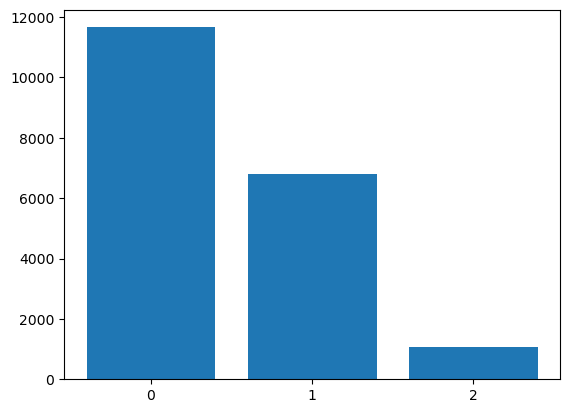

In [ ]:
correct_hist(df["Qualidade"])

In [ ]:
df["Qualidade"].value_counts()

0    11664
1     6788
2     1074
Name: Qualidade, dtype: int64

O mesmo é feito em relação a cada fruta. Aqui notamos que boa parte do dataset está balanceado, com exceção das amostras de romã em comparação com as amostras das outras frutas.
<ul>
    <li>0 = Maçã</li>
    <li>1 = Banana</li>
    <li>2 = Guava (goiaba)</li>
    <li>3 = Lima</li>
    <li>4 = Laranja</li>
    <li>5 = Romã</li>
</ul>

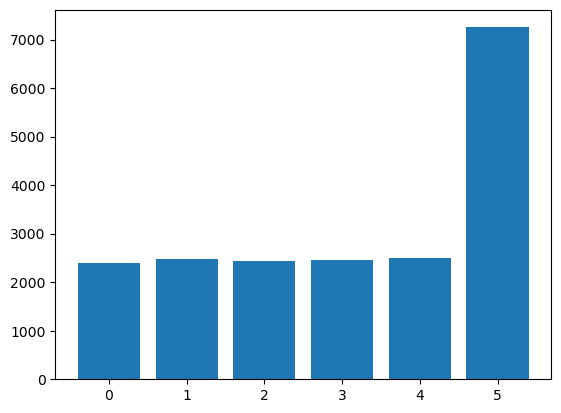

In [ ]:
correct_hist(df["Nome"])

Contagem de amostras de cada fruta.

In [ ]:
df["Nome"].value_counts()

5    7252
4    2500
1    2485
3    2457
2    2429
0    2403
Name: Nome, dtype: int64

## Separação de Features e Dados de Saída

Separa as features de cada imagem e o label esperado de saída.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#função auxiliar de normalização
def normalize(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    return scaler, scaler.transform(x)

In [ ]:
faixa_features = [str(i) for i in range(2048)]

#separa as feature e realiza 
scaler, features = normalize(np.array(df[faixa_features]))
qualidade = np.array(df['Qualidade'])
nome = np.array(df['Nome'])


## Balanceando o Dataset

Conforme é possível perceber, estes datasets se encontram desbalanceados, portanto antes de prosseguirmos, devemos seguir pela etapa de balanceamento.

Em relação à qualidade:

Aqui foi usada a técnica de oversampling para balancear as amostras.

In [ ]:
from imblearn.over_sampling import RandomOverSampler # Para a técnica usada
from imblearn.under_sampling import RandomUnderSampler # Não foi usado aqui, mas corresponde a uma alternativa

sampler = RandomOverSampler(random_state=42)

#features e saídas
features_q, qualidade_q = sampler.fit_resample(features, qualidade)

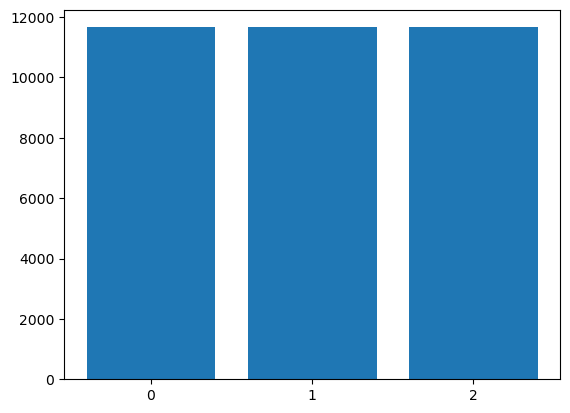

In [ ]:
correct_hist(qualidade_q)

### Em relação aos labels

Aqui também foi usada a técnica de oversampling para balancear as amostras.

In [ ]:
#features e saídas
features_n, nome_n = sampler.fit_resample(features, nome)

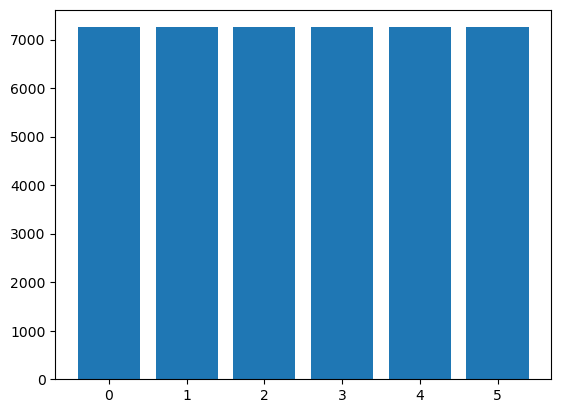

In [ ]:
correct_hist(nome_n)

# Detecção de qualidade - Treinando a MLP

Aqui codificamos as variáveis de saída, de modo que a mesma seja adequada ao processo de classificação multiclasses (one-hot encoded).

In [ ]:
from keras.utils import np_utils

qualidade_q = np_utils.to_categorical(qualidade_q)
qualidade_q

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

Separa o dataset em treino e teste.

Como pode ser visto, 40% do dataset foi separado para testes.

In [ ]:
from sklearn.model_selection import train_test_split


#separa em dataset de treino e teste, 60/40
x_train, x_test, y_train, y_test = train_test_split(features_q, qualidade_q, test_size=0.4, random_state= 29)

Faz o processo de escala nos dados

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler_x = StandardScaler().fit(x_train)

x_train = scaler_x.transform(x_train)
x_test =  scaler_x.transform(x_test)

In [ ]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### Grid search para encontrar os melhores hiperparâmetros

O código está comentado.
A saída resultante deste bloco de código contém os melhores hiperparâmetros identificados para a rede.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

"""
params = {'activation': ['relu', 'tanh'],
          'hidden_layer_sizes': [(50,), (100,), (100, 50,), (50, 100), (200,)],
          'solver': ['adam'],
          'learning_rate' : ['constant', 'invscaling'],
          'batch_size': [50, 100],
          'alpha': [0.05]
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123, max_iter=500), param_grid=params, n_jobs=-1, cv=5, verbose=10)
mlp_classif_grid.fit(x_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(x_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(x_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)
"""
"""
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Train Accuracy : 1.000
Test Accuracy : 0.969
Best Accuracy Through Grid Search : 0.968
Best Parameters :  {'activation': 'relu', 'alpha': 0.05, 'batch_size': 100, 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'solver': 'adam'}
"""

"\nFitting 5 folds for each of 40 candidates, totalling 200 fits\nTrain Accuracy : 1.000\nTest Accuracy : 0.969\nBest Accuracy Through Grid Search : 0.968\nBest Parameters :  {'activation': 'relu', 'alpha': 0.05, 'batch_size': 100, 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'solver': 'adam'}\n"

# Modelo

Treinando o modelo. 
Inicialmente seriam usados os hiperparâmetros encontrados no Grid Search. Porém, através dos vários testes realizados, alguns ajustes foram feitos.

In [ ]:
np.shape(y_train)

(20995, 3)

In [ ]:
np.shape(y_test)

(13997, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#para dar reproducibilidade
seed = 7
tf.random.set_seed(seed)

#cria o modelo
def create_model(opt, loss, metrics,  dropout_rate=0.0, initializer = 'normal', act = 'tanh'):
    model = Sequential()
    reg = tf.keras.regularizers.L2(l2=0.05)
    
    model.add(Dense(50, input_shape=(2048,), kernel_initializer= initializer, activation= act, kernel_regularizer=reg))
    model.add(Dropout(dropout_rate))
    model.add(Dense(100, kernel_initializer= initializer, activation= act, kernel_regularizer=reg))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, kernel_initializer= initializer, activation= act, kernel_regularizer=reg))

    
    model.compile(loss= loss, optimizer=opt, metrics= metrics)
    return model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
init = tf.keras.initializers.GlorotNormal(seed = 7)

loss = "categorical_crossentropy"
metrics = ["accuracy"]
act = "relu"

teste = create_model(opt = opt, loss = loss, metrics = metrics, dropout_rate=0.15, initializer =init, act = act)

history = teste.fit(x_train, y_train, epochs= 50, batch_size= 50, verbose=1,
                    validation_split = 0.3, shuffle=True)

Epoch 1/50
294/294 [==============================] - 7s 16ms/step - loss: 10.5885 - accuracy: 0.6389 - val_loss: 8.5798 - val_accuracy: 0.8400
Epoch 2/50
294/294 [==============================] - 4s 14ms/step - loss: 8.6042 - accuracy: 0.8159 - val_loss: 8.0984 - val_accuracy: 0.8949
Epoch 3/50
294/294 [==============================] - 4s 15ms/step - loss: 8.0614 - accuracy: 0.8666 - val_loss: 7.6877 - val_accuracy: 0.9143
Epoch 4/50
294/294 [==============================] - 4s 14ms/step - loss: 7.6137 - accuracy: 0.8951 - val_loss: 7.2849 - val_accuracy: 0.9301
Epoch 5/50
294/294 [==============================] - 4s 14ms/step - loss: 7.1928 - accuracy: 0.9130 - val_loss: 6.8635 - val_accuracy: 0.9392
Epoch 6/50
294/294 [==============================] - 5s 18ms/step - loss: 6.7575 - accuracy: 0.9243 - val_loss: 6.4622 - val_accuracy: 0.9454
Epoch 7/50
294/294 [==============================] - 5s 17ms/step - loss: 6.3460 - accuracy: 0.9358 - val_loss: 6.0669 - val_accuracy: 0.947

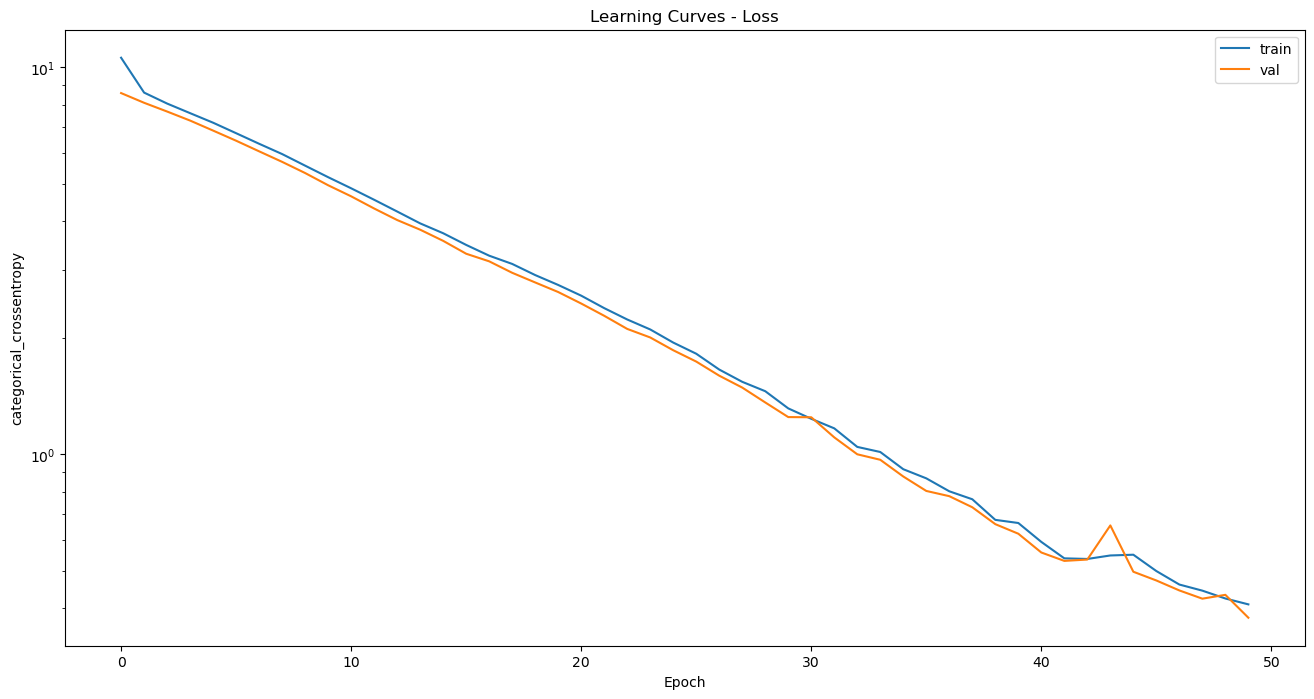

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Learning Curves - Loss')
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')

#escala logarítimica, para facilitar a visualização
plt.semilogy(history.history['loss'], label='train')
plt.semilogy(history.history['val_loss'], label='val')
plt.legend()
plt.show()

A figura seguinte mostra as curvas referentes ao aprendizado, mostrando a evolução da acurácia. Note que, apesar do grande ruído aparente, devemos levar em consideração a pequena escala da acurácia no gráfico.

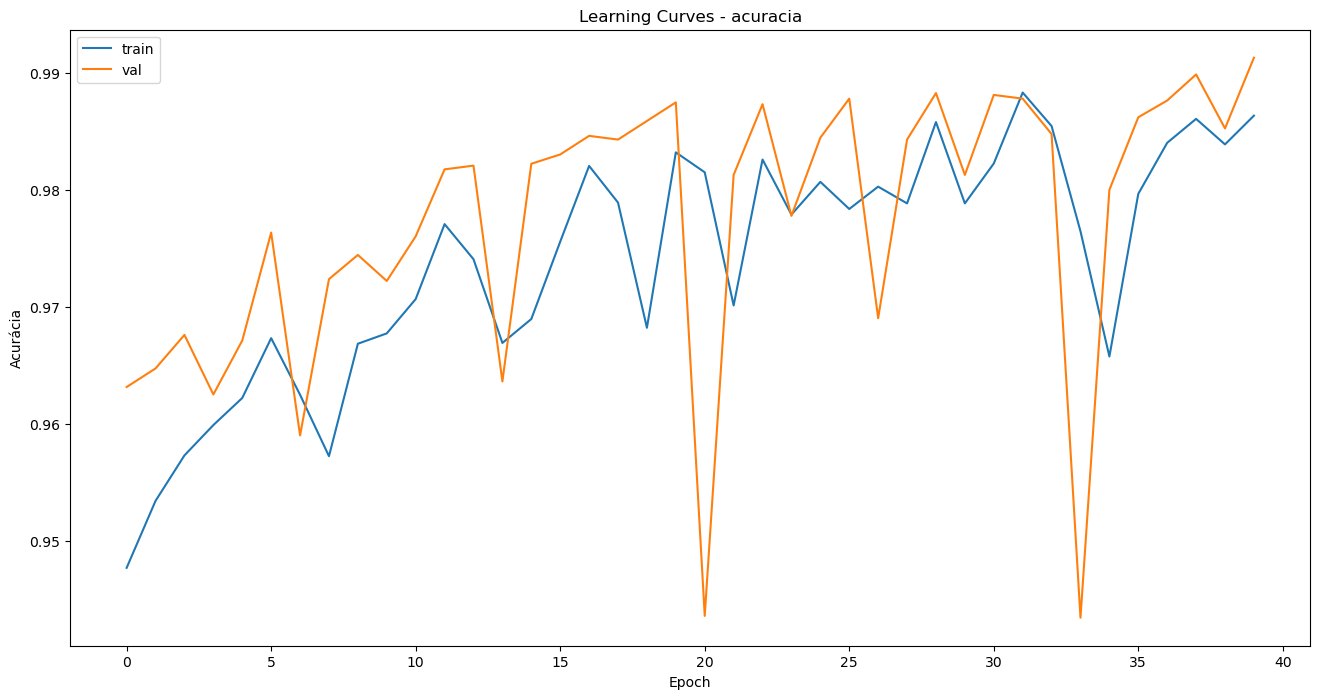

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Learning Curves - acuracia')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.plot(history.history['accuracy'][10:], label='train')
plt.plot(history.history['val_accuracy'][10:], label='val')
plt.legend()
plt.show()

In [ ]:
# Avaliando o modelo
_, train_acc = teste.evaluate(x_train, y_train, verbose=0)
_, test_acc = teste.evaluate(x_test, y_test,  verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.994, Test: 0.990


438/438 [==============================] - 2s 4ms/step


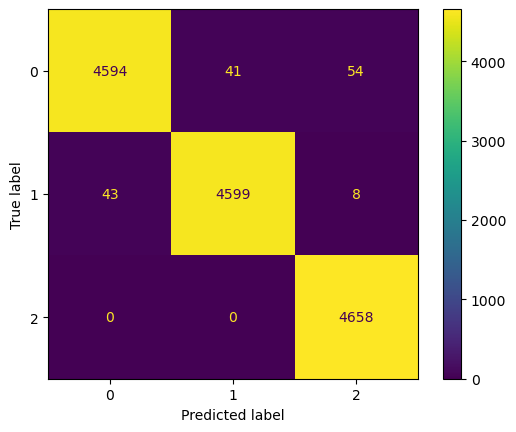

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = teste.predict(x_test)

# Aplica a função argmax
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()